In [35]:
import time
import random
from IPython.display import Image

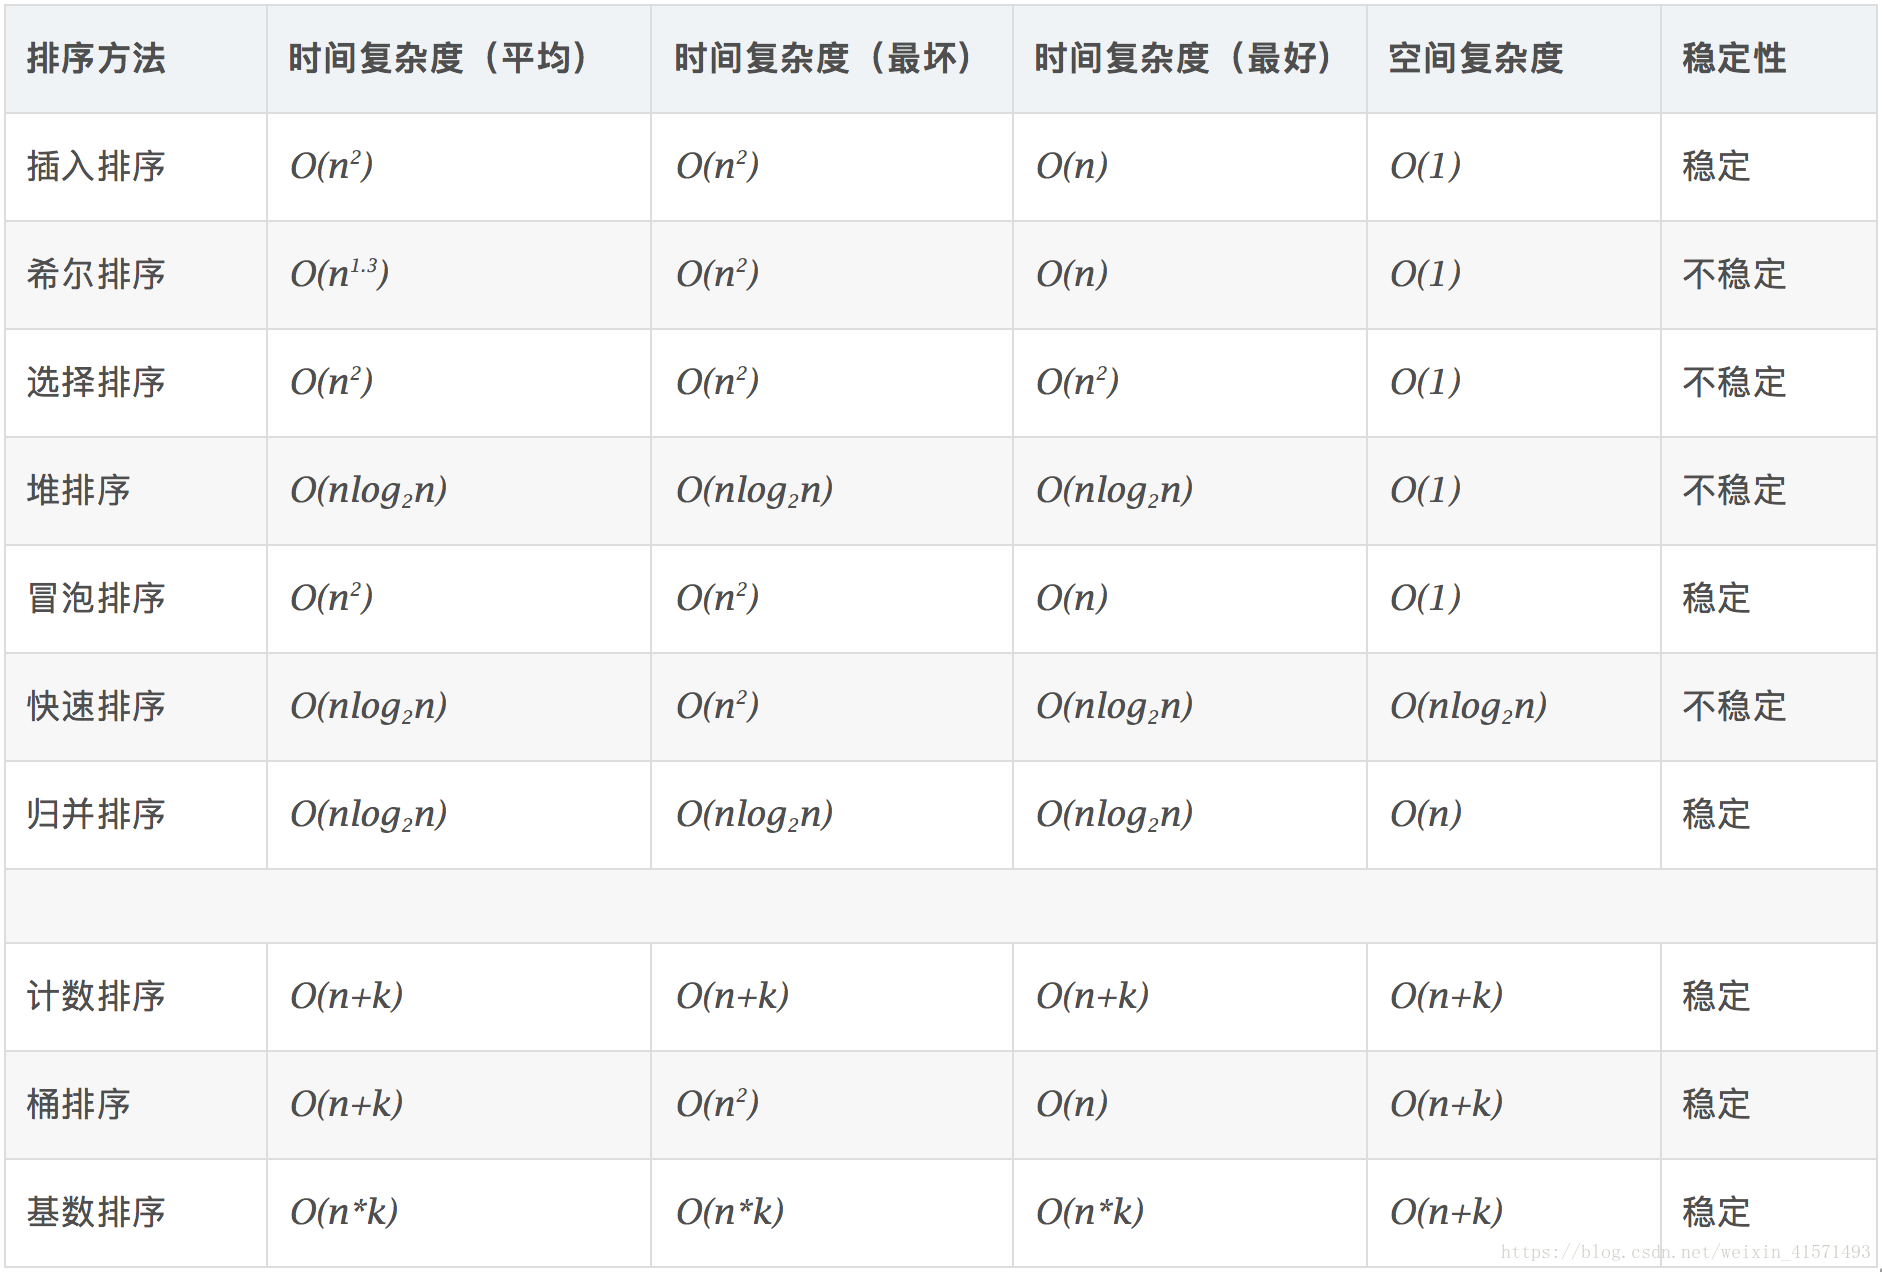

In [37]:
Image('images/1-排序算法时间复杂度.png')

#### 史上最简单十大排序算法（Python实现）
https://blog.csdn.net/weixin_41571493/article/details/81875088?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-3.channel_param&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-3.channel_param

## 冒泡排序（n^2）

>原理：依次比较相邻的两个值，将较大的值后移，第一轮结束将最大的数移到最右侧，第二轮结束将第二大数移到倒数第二的位置，依次进行

In [10]:
def bubble_sort(arr):
    for i in range(len(arr)-1):   # 控制冒泡需要进行几轮
        for j in range(len(arr)-i-1):    # 控制每轮冒泡的交换次数, n个数只需要交换n-1次
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

sort_arr = bubble_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 选择排序（n^2）
>双层循环，第一轮循环找到最小数放到第一个位置，第二轮找到第二小数放到第二个位置，依次进行

In [16]:
def select_sort(arr):
    for i in range(len(arr)-1):    # 控制外层循环次数
        min = i       # 记录最小下标
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min] , arr[i]
    return arr

sort_arr = select_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 插入排序
>原理: 第一个数认为是有序的，取出后一个元素，找到合适自己的位置然后插入，依次进行

In [27]:
def insert_sort(arr):
    for i in range(1, len(arr)):
        j = i
        cur = arr[i]   # 待插入的数
        while j > 0 and cur < arr[j-1]:   #使用cur，如果使用arr[i]，当第一次交换后j会改变i位置的值
            arr[j] = arr[j-1]
            j -= 1
        arr[j] = cur
    return arr

sort_arr = insert_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 希尔排序
> 在插入排序的基础上的扩展，每次取gap个间隔的数然后进行插入

In [1]:
def shell_sort(arr):
    n = len(arr)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            j = i
            cur = arr[i]
            while j > gap - 1 and cur < arr[j-gap]:
                arr[j] = arr[j-gap]
                j -= gap
            arr[j] = cur
        gap = gap // 2
    return arr

sort_arr = shell_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 归并排序
>将arr划分到最小然后依次两两归并排序

In [2]:
def merge(left, right):
    res = []
    while len(left) > 0 and len(right) > 0:
        if left[0] < right[0]:
            res.append(left[0])
            del left[0]
        else:
            res.append(right[0])
            del right[0]
    return res + left + right 
    
    
def merge_sort(arr):
    n = len(arr)
    if n <= 1:
        return arr
    mid = n // 2
    left = arr[:mid]
    right = arr[mid:]
    return merge(merge_sort(left), merge_sort(right))

sort_arr = merge_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 快排

In [11]:
def quick_sort(arr):
    n = len(arr)
    if n < 2:
        return arr
    
    pivot = arr[0]
    small, big = [], []
    for i in range(1, n):
        if arr[i] < pivot:
            small.append(arr[i])
        else:
            big.append(arr[i])
    return quick_sort(small) + [pivot] + quick_sort(big)

sort_arr = quick_sort([6,1,2,3,4,5,11,2,9])
sort_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 计数排序
1. 找到数组中最大的数字，构建相等于原数组的计数0数组
2. 遍历对数组中的数字个数进行统计
3. 将统计好的数按顺序开始填充到res数组

In [6]:
def count_sort(arr):
    n = len(arr)
    maximum = max(arr)
    count = [0] * (maximum+1)
    for i in arr:
        count[i] += 1
    res = []
    for i in range(len(count)):
        for j in range(count[i]):
            res.append(i)
    return res

count_arr = count_sort([6,1,2,3,4,5,11,2,9])
count_arr

[1, 2, 2, 3, 4, 5, 6, 9, 11]

## 桶排序

In [ ]:
import math
def RadixSort(lst):
    def getbit(x,i):       #返回x的第i位（从右向左，个位为0）数值
        y=x//pow(10,i)
        z=y%10
        return z
    def CountSort(lst):
        n=len(lst)
        num=max(lst)
        count=[0]*(num+1)
        for i in range(0,n):
            count[lst[i]]+=1
        arr=[]
        for i in range(0,num+1):
            for j in range(0,count[i]):
                arr.append(i)
        return arr
    Max=max(lst)
    for k in range(0,int(math.log10(Max))+1):             #对k位数排k次,每次按某一位来排
        arr=[[] for i in range(0,10)]
        for i in lst:                 #将ls（待排数列）中每个数按某一位分类（0-9共10类）存到arr[][]二维数组（列表）中
            arr[getbit(i,k)].append(i)
        for i in range(0,10):         #对arr[]中每一类（一个列表）  按计数排序排好
            if len(arr[i])>0:
                arr[i]=CountSort(arr[i])
        j=9
        n=len(lst)
        for i in range(0,n):     #顺序输出arr[][]中数到ls中，即按第k位排好
            while len(arr[j])==0:
                j-=1
            else:
                ls[n-1-i]=arr[j].pop()   
    return lst    
    
x=input("请输入待排序数列：\n")
y=x.split()
arr=[]
for i in  y:
    arr.append(int(i))
arr=RadixSort(arr)
#print(arr)
print("数列按序排列如下：")
for i in arr:
    print(i,end=' ')

## 基数排序

In [ ]:
def radix_sort(array, base=10):
    start = time.time()    
    def list_to_buckets(array, base, iteration):
        buckets = [[] for _ in range(base)]
        for number in array:
            # Isolate the base-digit from the number
            digit = (number // (base ** iteration)) % base
            # Drop the number into the correct bucket
            buckets[digit].append(number)
        return buckets

    def buckets_to_list(buckets):
        numbers = []
        for bucket in buckets:
            # append the numbers in a bucket
            # sequentially to the returned array
            for number in bucket:
                numbers.append(number)
        return numbers

    maxval = max(array)

    it = 0
    # Iterate, sorting the array by each base-digit
    while base ** it <= maxval:
        array = buckets_to_list(list_to_buckets(array, base, it))
        it += 1

    t = time.time() - start
    return len(array), t 